In [2]:
import torch
import torchaudio#
import matplotlib.pyplot as plt
import numpy as np
import librosa.display
import librosa
import matplotlib.pyplot as plt

In [42]:
results = torch.load('result/res_AST_EmbeddingsDataset_AUDIO_MNIST_AST_10wpc.pt', weights_only=False)

In [46]:
import IPython.display as ipd
sample = 13
wav = results['data'][0][0][sample]
label = results['data'][0][1][sample]
label_to_name = ['air_conditioner', 'car_horn', 'children_playing', 'dog_bark',
                 'drilling', 'engine_idling', 'gun_shot', 'jackhammer',
                 'siren', 'street_music']
label_to_name = [str(i) for i in range(10)]  # Assuming labels are integers from 0 to 9
print(f"Label: {label_to_name[label]}")
ipd.Audio(wav.numpy(), rate=16000)

Label: 1


In [91]:
sample =12
spectrogram = results['data'][0][0][sample]
label = results['data'][0][1][sample]
label_to_name = ['air_conditioner', 'car_horn', 'children_playing', 'dog_bark',
                 'drilling', 'engine_idling', 'gun_shot', 'jackhammer',
                 'siren', 'street_music']
print(f"Label: {label_to_name[label]}")

Label: car_horn


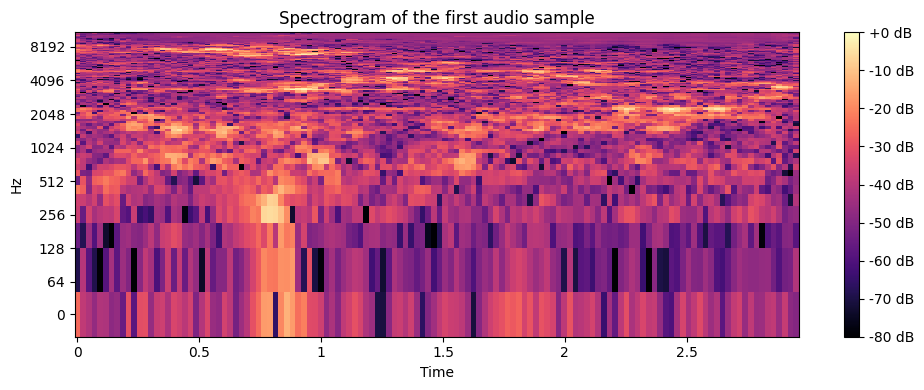

In [92]:
def plot_spectrogram(spectrogram, title=None):
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(librosa.amplitude_to_db(spectrogram.squeeze(0).numpy(), ref=np.max), y_axis='log', x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    if title:
        plt.title(title)
    plt.tight_layout()
    plt.show()
plot_spectrogram(spectrogram, title='Spectrogram of the first audio sample')

In [93]:
for i in range(2048):
  try:
    transform = torchaudio.transforms.GriffinLim(n_fft = i)
    waveform = transform(spectrogram)
    print(i)
  except:
    continue

254
255


In [86]:
2048 // 2 + 1 

1025

In [87]:
# linear_spec_estimate = torchaudio.transforms.InverseMelScale(
#      n_stft=2048, sample_rate=16000 )(spectrogram)

# transform = torchaudio.transforms.GriffinLim(n_fft=2048, hop_length=512)
# waveform = transform(spectrogram)

In [94]:
spectrogram = torch.abs(spectrogram)  # If it might be complex or have negative values
spectrogram = torch.clamp(spectrogram, min=1e-8) 

In [ ]:

spectrogram = torch.abs(spectrogram)  # If it might be complex or have negative values
spectrogram = torch.clamp(spectrogram, min=1e-8) 
transform = torchaudio.transforms.GriffinLim(n_fft=255)
waveform = transform(spectrogram)

In [96]:
# play the waveform
import IPython.display as ipd
ipd.Audio(waveform.numpy(), rate=16000)

In [5]:
import torch
import torchaudio
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import random
import argparse
import IPython.display as ipd
import os

# Dataset-specific label mappings
dataset_label_mappings = {
    'URBANSOUND8K': [
        'air_conditioner', 'car_horn', 'children_playing', 'dog_bark',
        'drilling', 'engine_idling', 'gun_shot', 'jackhammer',
        'siren', 'street_music'
    ],
    'GTZAN': [
        'blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
        'metal', 'pop', 'reggae', 'rock'
    ],
    'AUDIO_MNIST': [str(i) for i in range(10)]
}

# Functions

In [3]:
def load_results(file_path):
    """Load the results file"""
    results = torch.load(file_path, weights_only=False)
    return results


def play_sample(spectrogram, sample_rate=16000):
    """Convert spectrogram to audio and play it"""
    # Inverse mel spectrogram
    spectrogram = torch.abs(spectrogram)  # If it might be complex or have negative values
    spectrogram = torch.clamp(spectrogram, min=1e-8) 
    transform = torchaudio.transforms.GriffinLim(n_fft=255)
    waveform = transform(spectrogram)
    return waveform

def plot_spectrogram(spectrogram, title=None):
    """Plot the spectrogram"""
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(librosa.amplitude_to_db(spectrogram.squeeze(0).numpy(), ref=np.max), y_axis='log', x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    if title:
        plt.title(title)
    plt.tight_layout()
    plt.show()

def get_random_sample_by_class(results, class_idx):
    """Get a random sample of the specified class"""
    # Get all indices of the specified class
    class_indices = [i for i, label in enumerate(results['data'][0][1]) if label == class_idx]
    
    if not class_indices:
        print(f"No samples found for class {class_idx}")
        return None, None
    
    # Choose a random index
    random_idx = random.choice(class_indices)
    spectrogram = results['data'][0][0][random_idx]
    label = results['data'][0][1][random_idx]
    
    return spectrogram, label

def save_waveform(waveform, dir = "synthetic_sounds", file_name='output.wav', sample_rate=16000):
    """Save the waveform to a file"""
    # create the directory if it doesn't exist
    if not os.path.exists(dir):
        os.makedirs(dir)
    file_name = os.path.join(dir, file_name)
    torchaudio.save(file_name, waveform, sample_rate=sample_rate)
    print(f"Waveform saved to {file_name}")

# Sound Player

In [23]:
file = 'result/res_MELSPECTROGRAM_AUDIO_MNIST_SimplifiedConvNet_10wpc.pt'
dataset = 'AUDIO_MNIST'  # Change this to your dataset
idx = 55
results = load_results(file)
label_to_name = dataset_label_mappings[dataset]

wav = results['data'][0][0][idx]
label = results['data'][0][1][idx]

In [24]:
print(f"Label: {label_to_name[label]}")
ipd.Audio(wav, rate=16000)

Label: 5


In [325]:
# save_waveform(audio, file_name=f'sample_{idx}_{label_to_name[label]}.wav')

In [40]:
file = 'result/res_DM_URBANSOUND8K_ConvNet_10ipc.pt'
dataset = 'URBANSOUND8K'  # Change this to your dataset
class_idx = 3

results = load_results(file)
label_to_name = dataset_label_mappings[dataset]

spectrogram, label = get_random_sample_by_class(results, class_idx)

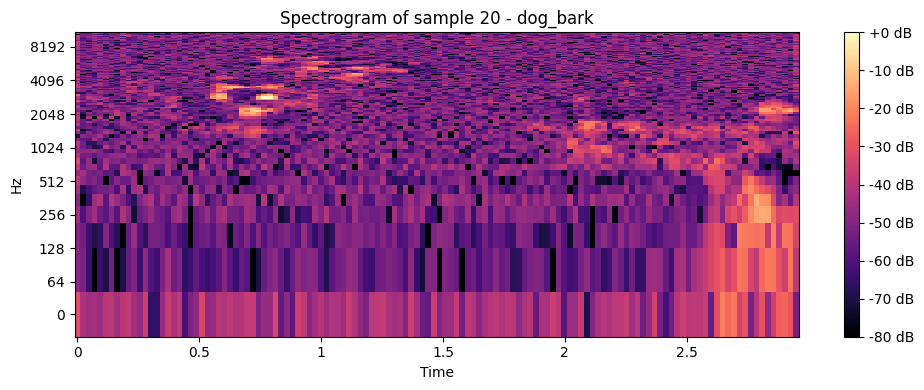

In [41]:
plot_spectrogram(spectrogram, title=f'Spectrogram of sample {idx} - {label_to_name[label]}')

In [42]:
audio = play_sample(spectrogram)
ipd.Audio(audio, rate=16000)

In [26]:
!pip install mirdata

     |████████████████████████████████| 260 kB 1.9 MB/s eta 0:00:01
     |████████████████████████████████| 2.8 MB 10.7 MB/s eta 0:00:01
     |████████████████████████████████| 250 kB 21.5 MB/s eta 0:00:01
  Using cached pretty_midi-0.2.10-py3-none-any.whl
     |████████████████████████████████| 67 kB 14.0 MB/s eta 0:00:01
  Using cached numpy-1.26.4-cp39-cp39-macosx_11_0_arm64.whl (14.0 MB)
     |████████████████████████████████| 199 kB 20.9 MB/s eta 0:00:01
     |████████████████████████████████| 61 kB 2.0 MB/s  eta 0:00:01
     |████████████████████████████████| 63 kB 10.9 MB/s eta 0:00:01
  Using cached wrapt-1.17.2-cp39-cp39-macosx_11_0_arm64.whl (38 kB)
     |████████████████████████████████| 88 kB 12.3 MB/s eta 0:00:01
  Using cached mir_eval-0.8.2-py3-none-any.whl (102 kB)
     |████████████████████████████████| 359 kB 19.7 MB/s eta 0:00:01
     |████████████████████████████████| 54 kB 10.2 MB/s eta 0:00:01
     |████████████████████████████████| 207 kB 17.7 MB/s eta 0:00:01
  

In [1]:
import mirdata

print(mirdata.list_datasets())

['acousticbrainz_genre', 'baf', 'ballroom', 'beatles', 'beatport_key', 'billboard', 'brid', 'candombe', 'cante100', 'cipi', 'compmusic_carnatic_rhythm', 'compmusic_carnatic_varnam', 'compmusic_hindustani_rhythm', 'compmusic_indian_tonic', 'compmusic_jingju_acappella', 'compmusic_otmm_makam', 'compmusic_raga', 'cuidado', 'da_tacos', 'dagstuhl_choirset', 'dali', 'egfxset', 'filosax', 'four_way_tabla', 'freesound_one_shot_percussive_sounds', 'giantsteps_key', 'giantsteps_tempo', 'good_sounds', 'groove_midi', 'gtzan_genre', 'guitarset', 'hainsworth', 'haydn_op20', 'idmt_smt_audio_effects', 'ikala', 'irmas', 'maestro', 'mdb_stem_synth', 'medley_solos_db', 'medleydb_melody', 'medleydb_pitch', 'mridangam_stroke', 'mtg_jamendo_autotagging_moodtheme', 'openmic2018', 'orchset', 'phenicx_anechoic', 'queen', 'rwc_classical', 'rwc_jazz', 'rwc_popular', 'salami', 'saraga_carnatic', 'saraga_hindustani', 'scms', 'simac', 'slakh', 'tinysol', 'tonality_classicaldb', 'tonas', 'vocadito']


In [2]:
medley_dataset = mirdata.initialize('medley_solos_db', data_home='data/Medley-solos-DB')
# mdeley_dataset.download()
# medley_dataset

In [3]:
# splits = medley_dataset.get_random_track_splits(splits = [0.8,0.2])

In [4]:
len(medley_dataset.track_ids)

21571

In [5]:
for track_id in medley_dataset.track_ids:
  print(track_id)
  track = medley_dataset.track(track_id)
  print(track.instrument)
  break

0e4371ac-1c6a-51ab-fdb7-f8abd5fbf1a3
clarinet


In [ ]:
medley_dataset.Trackirdata.datasets.medley_solos_db.Track(splits[0][1]).audio_path

AttributeError: 'Dataset' object has no attribute 'Track'

In [17]:
mirdata.datasets.medley_solos_db.Track(splits[0][1]).audio_path

TypeError: __init__() missing 4 required positional arguments: 'data_home', 'dataset_name', 'index', and 'metadata'